1. Partition Based Metjods - KMeans
2. Heirarchical - Agglomerative

In [1]:
#1 importing the dataset
import pandas as pd
customers_df = pd.read_csv("Salary_data.csv");
customers_df.head(5)

,age,income
0,25,69343
1,28,66205
2,30,57731
3,29,63525
4,31,69891


# KMeans
###### Step 1: It randomly selects 'k' data objects from the dataseteach of which represents a Cluster Center
###### Step 2: Repeat for each of the remaining data objects, an object is assigned to a cluster to which it is most similar i.e minimum distance (based on the distance between the object and cluster center)
###### Step 3: It then computes a new mean for each respective cluster until there is no change

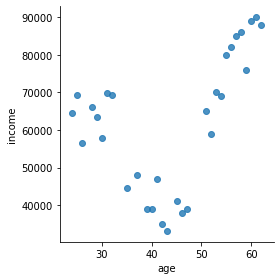

In [3]:
#2 importing the libraries
import numpy as np
import seaborn as sn
import matplotlib as plt
%matplotlib inline
# here we dont want to use line regression therefore fit_reg = False
# plotting the graph between "income" and "age"
sn.lmplot("age" , "income" , data = customers_df , fit_reg = False , size = 4)

In [4]:
#3 KMEANS
from sklearn.cluster import KMeans
#KMeans 3 -> choose 3 random centers
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [5]:
# by this we are assignming the cluster number to the repective data item based on first iteration of cluster.fit(df)
customers_df["clusterid"] = clusters.labels_
customers_df.head()

,age,income,clusterid
0,25,69343,2
1,28,66205,2
2,30,57731,2
3,29,63525,2
4,31,69891,2


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


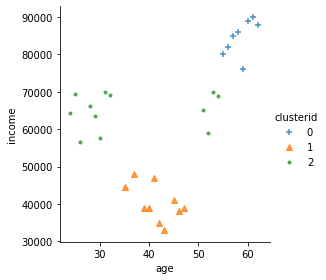

In [7]:
#4 PLOTTING THE CLUSTERS
# beacuse we are using 3 clusters
marker = ['+' , '^' , '.']
sn.lmplot("age" , "income" , data = customers_df , hue = "clusterid" , fit_reg = False , markers = marker , size = 4)

In [11]:
#5 scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age" , "income"]])
scaled_customers_df[0:5]

array([[-1.58294052,  0.41411441],
       [-1.33212248,  0.23763705],
       [-1.16491046, -0.23893055],
       [-1.24851647,  0.08691707],
       [-1.08130444,  0.44493328]])

In [14]:
#6 KMEANS again after scaling the features
from sklearn.cluster import KMeans
#KMeans 3 -> choose 3 random centers
clusters_new = KMeans(3)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


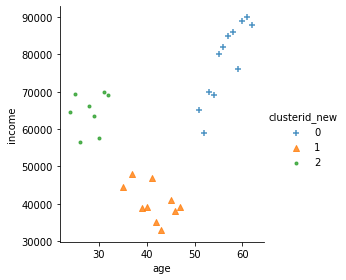

In [15]:
#7 PLOTTING AGAIN 
marker = ['+' , '^' , '.']
sn.lmplot("age" , "income" , data = customers_df , hue = "clusterid_new" , fit_reg = False , markers = marker , size = 4)

In [16]:
#PROBLEM STATEMENT
# Use the bev.csv dataset and apply KMeans and Agglomerative clustering; Compare the cluster 

In [18]:
#1 Importing the dataset
bev_df = pd.read_csv("bev.csv")
bev_df.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [20]:
# we have already imported the libraries :-)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_bev_df = scaler.fit_transform(bev_df[["Potassium" , "Sodium" , "Caffeine" , "Cost"]])
scaled_bev_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

In [24]:
from sklearn.cluster import KMeans
#KMeans 3 -> choose 3 random centers
clusters = KMeans(3)
clusters.fit(scaled_bev_df)
bev_df["clusterid"] = clusters.labels_

In [27]:
# TO LOOK AT THE CLUSTERS
bev_df[bev_df.clusterid == 0]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid_new,clusterid
0,new_england_coffee,144,15,4.7,0.43,0,0
1,post_alley_blend,151,19,4.9,0.43,0,0
5,jacobs_coffee,145,23,4.6,0.28,0,0
6,grounds_hounds_coffee,175,24,5.5,0.40,0,0
7,la_columbe_corisca,149,27,4.7,0.42,0,0
10,red_bay_coffee,140,18,4.6,0.44,0,0
16,irish_hazelnut_coffee,139,19,4.4,0.43,0,0
17,cremoso_coffee,144,24,4.9,0.43,0,0


In [ ]:
# AGGLOMERATIVE -> bottom up approach , initially every dataitem is considered as clusters and 
# then they are merged together until their is no change 
from sklearn.